<a href="https://colab.research.google.com/github/android-kunjapppan/PyTorch-Tutorial/blob/master/PyTorch_Lec5_ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm


# makes sure there is no need to download data every time
REBUILD_DATA = True

In [ ]:
class DogsVSCats():
    img_size = 128
    cats = "../input/dogs-cats-images/dataset/training_set/cats"
    dogs = "../input/dogs-cats-images/dataset/training_set/dogs"
    
    labels = {cats:0,dogs:1}
    training_data = []
    
    # For checking if there is any class Imbalance
    catcount=0
    dogcount=0
    
    def make_training_data(self):
        for label in self.labels:
            print(label)
            
            for f in tqdm(os.listdir(label)):
                try:
                    path = os.path.join(label,f)
                    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img,(self.img_size,self.img_size))
                    self.training_data.append([np.array(img),np.eye(2)[self.labels[label]]])


                    if label == self.cats:
                        self.catcount+=1
                    else:
                        self.dogcount+=1
                        
                except Exception as e:
                    pass
                
        # Shuffling the training data
        np.random.shuffle(self.training_data)
        np.save("training_data.npy",self.training_data)
        print("CAts:",self.catcount)
        print("dogs:",self.dogcount)
        
if REBUILD_DATA:
    dogsvscats = DogsVSCats()
    dogsvscats.make_training_data()

  0%|          | 16/4000 [00:00<00:24, 159.45it/s]

../input/dogs-cats-images/dataset/training_set/cats


  1%|          | 32/4000 [00:00<00:12, 318.88it/s]

../input/dogs-cats-images/dataset/training_set/dogs


100%|██████████| 4000/4000 [00:12<00:00, 307.72it/s]


CAts: 4000
dogs: 4000


* np.eye() --> TO convert into OneHotEncoder

In [ ]:
training_data =np.load('training_data.npy',allow_pickle=True)

In [ ]:
print(len(training_data))

8000


In [ ]:
print(training_data[1])

[array([[150, 153, 153, ..., 154, 153, 152],
       [152, 151, 151, ..., 152, 152, 152],
       [152, 151, 136, ..., 163, 151, 152],
       ...,
       [150, 147, 141, ..., 152, 152, 152],
       [153, 152, 151, ..., 152, 152, 152],
       [153, 149, 152, ..., 152, 152, 152]], dtype=uint8)
 array([0., 1.])]


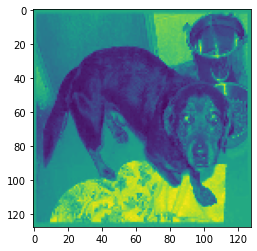

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(training_data[1][0],cmap = "gray")